# 0530 전처리해보기  
- Cabin,Ticket 버리기 
- SibSp + Parch = Fsize로 동승자 여러명인 행 Fare값 각각 평균채우기 
- Age : title과 fsize관계 따져서 NaN 처리
    - Pclass=1 & Ticket='PC' => 선착장 S(1), 중년(2) 여성(생존), 남자(사망) 
- Pclass, fsize, fare, embarked, title 

---
- 데이터 불러오기

In [400]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [401]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---
### Cabin,Ticket drop

In [402]:
drop_feature = ['Cabin','Ticket']
train = train.drop(drop_feature, axis=1)
test = test.drop(drop_feature, axis=1)

---
### train Embarked
- nan 처리 => S
- feature ( S:1, C:2, Q:3)

In [403]:
train.loc[train['Embarked'].isnull(),'Embarked'] = 'S'

In [404]:
embarked_mapping = {'S':1,'C':2,'Q':3}

train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

---
### Title Mapping, Feature
- Master ==> 0
- Miss : Mlle, Ms, Countess ==> 1      
- Mrs : 'Lady','Dona' ==> 2
- Mr : 'Mme', 'Dr', 'Sir','Capt','Rev','Major','Col','Jonkheer','Don'  ==> 3 

In [405]:
train['Title'] = train['Name'].str.extract(' ([a-zA-Z]+)\. ', expand=False)
test['Title'] = test['Name'].str.extract(' ([a-zA-Z]+)\. ', expand=False)

In [406]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [407]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [408]:
train_test_data = [train, test]

for train_title in train_test_data : 
    train_title['Title'] = train_title['Title'].replace(['Mlle', 'Ms', 'Countess'],'Miss')
    train_title['Title'] = train_title['Title'].replace(['Mme', 'Dr', 'Sir','Capt','Rev','Major','Col','Jonkheer','Don'],'Mr')
    train_title['Title'] = train_title['Title'].replace(['Lady','Dona'],'Mrs')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,Mr


In [409]:
# title feature
title_mapping = {'Master':0, 'Miss':1,'Mrs':2,'Mr':3}

train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

In [410]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
 10  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


---
### Fsize = SibSp + Parch + 1
- 함께 탑승한 인원 확인하기

In [411]:
train['Fsize'] = train['SibSp'] + train['Parch'] + 1
test['Fsize'] = test['SibSp'] + test['Parch'] + 1

---
### Age Mapping

In [412]:
# Age Feature 

train_test_data = [train, test]

for age_feature in train_test_data : 
    age_feature.loc[age_feature['Age']<=14,'Age'] = 0
    age_feature.loc[(age_feature['Age'] > 14) & (age_feature['Age'] < 30),'Age'] = 1
    age_feature.loc[(age_feature['Age'] >= 30) & (age_feature['Age'] <50),'Age'] = 2
    age_feature.loc[(age_feature['Age'] > 50),'Age'] = 3

In [413]:
# Age NaN 처리
for age_nan in train_test_data : 
    # Mr인 혼자인 남성은 age 2로 채우기 
    age_nan.loc[(age_nan['Title']==3)&(age_nan['Sex']=='male'),'Age'] = 2

    # Mrs인 동승자 있는 여성 age 2로 채우기 
    age_nan.loc[(age_nan['Title']==2)&(age_nan['Fsize']>=2),'Age'] = 2

    # Master age 0로 채우기 => 가족여행 온 어린 아이로 예측
    age_nan.loc[(age_nan['Title']==0), 'Age'] = 0

    # Miss age 1로 채우기 => 여행온 젊은이라고 예측
    age_nan.loc[(age_nan['Title']==1), 'Age'] = 1 

    # Mr age 3으로 채우기 => 청년일것을 예측
    age_nan.loc[(age_nan['Title']==3)&(age_nan['Age'].isnull()), 'Age'] = 1

    # Mrs age 2로 채우기 => 생존률이 높은 것으로보아 엄마는 청년으로 예측
    age_nan.loc[(age_nan['Title']==2)&(age_nan['Age'].isnull()), 'Age'] = 1

In [414]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
 10  Title        891 non-null    int64  
 11  Fsize        891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


In [415]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    int64  
 9   Title        418 non-null    int64  
 10  Fsize        418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


---
### Fare feature, NaN 
- Fare 0~24  =>  1
- Fare 25~250  => 2
- Fare 251~  => 3

In [416]:
import seaborn as sns

In [417]:
# test data fare NaN 처리 ==> pclass의 중앙값으로 채우기 
test['Fare'].fillna(
    test.groupby('Pclass')['Fare'].transform('median')
    , inplace= True
)

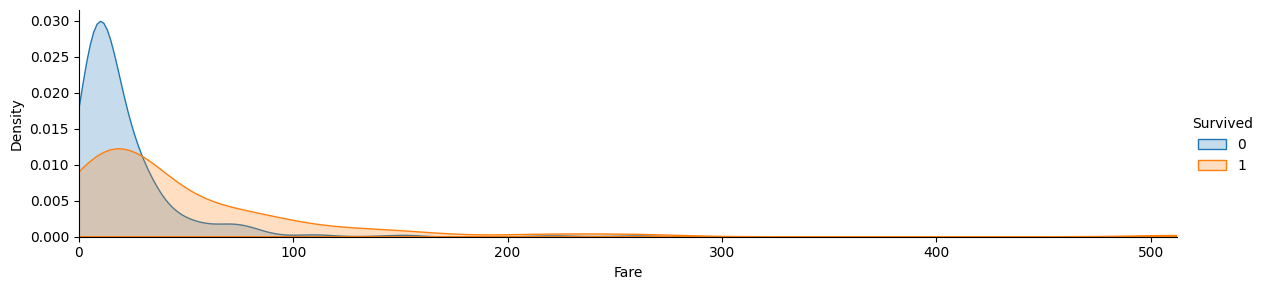

In [418]:
# Fare별 Survived 시각화 
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', fill=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.show()

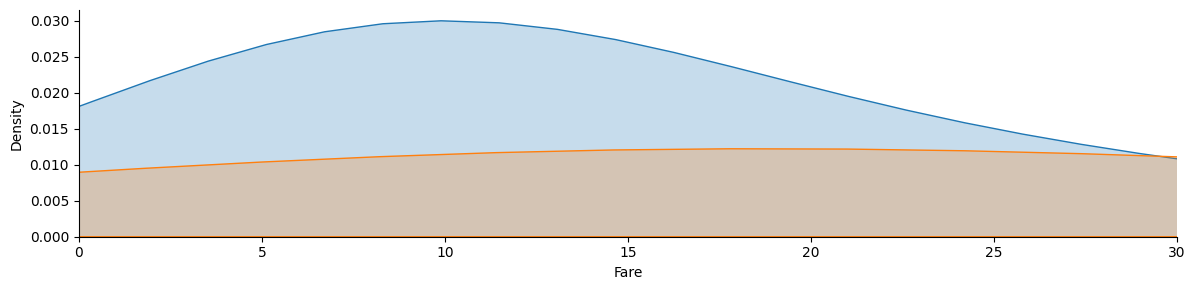

In [419]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', fill=True)
facet.set(xlim=(0,30))

In [420]:
train[(train['Pclass']==1)&(train['Fare']<50)]
# 여기에서 살아남은 사람은 여자들뿐, age는 30~50 중년, 선착장 1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fsize
11,12,1,1,"Bonnell, Miss. Elizabeth",female,1.0,0,0,26.5500,1,1,1
23,24,1,1,"Sloper, Mr. William Thompson",male,2.0,0,0,35.5000,1,3,1
30,31,0,1,"Uruchurtu, Don. Manuel E",male,2.0,0,0,27.7208,2,3,1
55,56,1,1,"Woolner, Mr. Hugh",male,2.0,0,0,35.5000,1,3,1
64,65,0,1,"Stewart, Mr. Albert A",male,2.0,0,0,27.7208,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
857,858,1,1,"Daly, Mr. Peter Denis",male,2.0,0,0,26.5500,1,3,1
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,2.0,0,0,25.9292,1,2,1
872,873,0,1,"Carlsson, Mr. Frans Olof",male,2.0,0,0,5.0000,1,3,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,1.0,0,0,30.0000,1,1,1


In [421]:
train[train['Fare']== 0.0000]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fsize
179,180,0,3,"Leonard, Mr. Lionel",male,2.0,0,0,0.0,1,3,1
263,264,0,1,"Harrison, Mr. William",male,2.0,0,0,0.0,1,3,1
271,272,1,3,"Tornquist, Mr. William Henry",male,2.0,0,0,0.0,1,3,1
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,2.0,0,0,0.0,1,3,1
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,2.0,0,0,0.0,1,3,1
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,2.0,0,0,0.0,1,3,1
466,467,0,2,"Campbell, Mr. William",male,2.0,0,0,0.0,1,3,1
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,2.0,0,0,0.0,1,3,1
597,598,0,3,"Johnson, Mr. Alfred",male,2.0,0,0,0.0,1,3,1
633,634,0,1,"Parr, Mr. William Henry Marsh",male,2.0,0,0,0.0,1,3,1


In [422]:
train[(train['Pclass']==3)&(train['Title']==3)&(train['Embarked']==1)&(train['Fsize']==1)]['Fare'].median()

7.8958

In [423]:
# FARE=0을 중간값으로 채우기 
for fare_zero in train_test_data:    
    fare_zero.loc[(fare_zero['Pclass']==1)&(fare_zero['Title']==3)&(fare_zero['Embarked']==1)&(fare_zero['Fsize']==1)&(fare_zero['Fare']==0.0000),'Fare'] = 26.55
    fare_zero.loc[(fare_zero['Pclass']==2)&(fare_zero['Title']==3)&(fare_zero['Embarked']==1)&(fare_zero['Fsize']==1)&(fare_zero['Fare']==0.0000),'Fare'] = 13.0
    fare_zero.loc[(fare_zero['Pclass']==3)&(fare_zero['Title']==3)&(fare_zero['Embarked']==1)&(fare_zero['Fsize']==1)&(fare_zero['Fare']==0.0000),'Fare'] = 27.89

- fsize에 따른 fare 값 조정하기 

In [424]:
# fsize 알아보기 
train['Fsize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [425]:
train[train['Fsize']==11]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fsize
159,160,0,3,"Sage, Master. Thomas Henry",male,0.0,8,2,69.55,1,0,11
180,181,0,3,"Sage, Miss. Constance Gladys",female,1.0,8,2,69.55,1,1,11
201,202,0,3,"Sage, Mr. Frederick",male,2.0,8,2,69.55,1,3,11
324,325,0,3,"Sage, Mr. George John Jr",male,2.0,8,2,69.55,1,3,11
792,793,0,3,"Sage, Miss. Stella Anna",female,1.0,8,2,69.55,1,1,11
846,847,0,3,"Sage, Mr. Douglas Bullen",male,2.0,8,2,69.55,1,3,11
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,1.0,8,2,69.55,1,1,11


In [426]:
69.55 /11

6.322727272727272

In [427]:
train[(train['Pclass']==3)&(train['Fsize']==2)]['Fare'].median()

14.4542

In [428]:
14.4542/2

7.2271

In [429]:
# Fsise가 여러명일 경우 fare / fsize로 Fare 값 채우기
for fare_replace in train_test_data : 
    # fsize =11
    fare_replace.loc[fare_replace['Fsize']==11, 'Fare'] = 6.32

    # fsize = 8
    fare_replace.loc[fare_replace['Fsize']==8 ,'Fare'] = 5.8625

    # fsize = 7
    fare_replace.loc[(fare_replace['Fsize']==7)&(fare_replace['Fare']==31.2750),'Fare']= 4.48
    fare_replace.loc[(fare_replace['Fsize']==7)&(fare_replace['Fare']==31.3875),'Fare']= 4.48

    # fsize = 6
    fare_replace.loc[(fare_replace['Fsize']==6)&(fare_replace['Fare']>=18)&(fare_replace['Fare']<40),'Fare']= 5.27
    fare_replace.loc[(fare_replace['Fsize']==6)&(fare_replace['Fare']==263),'Fare']= 43.83

    # fsize = 5
    fare_replace.loc[(fare_replace['Fsize']==5)&(fare_replace['Fare']>=20)&(fare_replace['Fare']<35),'Fare']= 5
    fare_replace.loc[(fare_replace['Fsize']==5)&(fare_replace['Fare']==262.3750),'Fare']= 52.475

    # fsize = 4
    fare_replace.loc[(fare_replace['Pclass']==1)&(fare_replace['Fsize']==4),'Fare']= 33.38
    fare_replace.loc[(fare_replace['Pclass']==2)&(fare_replace['Fsize']==4),'Fare']= 9.14
    fare_replace.loc[(fare_replace['Pclass']==3)&(fare_replace['Fsize']==4),'Fare']= 5.02

    # fsize = 3 
    fare_replace.loc[(fare_replace['Pclass']==1)&(fare_replace['Fsize']==3),'Fare']= 27.50
    fare_replace.loc[(fare_replace['Pclass']==2)&(fare_replace['Fsize']==3),'Fare']= 8.75
    fare_replace.loc[(fare_replace['Pclass']==3)&(fare_replace['Fsize']==3),'Fare']= 5.24

    # fsize = 2
    fare_replace.loc[(fare_replace['Pclass']==1)&(fare_replace['Fsize']==2),'Fare']= 38.3646
    fare_replace.loc[(fare_replace['Pclass']==2)&(fare_replace['Fsize']==2),'Fare']= 13.0
    fare_replace.loc[(fare_replace['Pclass']==3)&(fare_replace['Fsize']==2),'Fare']= 7.2271

In [430]:
# fare 구간 나누기 
for fare_feature in train_test_data : 
    fare_feature.loc[fare_feature['Fare'] <=7, 'Fare'] = 0
    fare_feature.loc[(fare_feature['Fare'] > 7) & (fare_feature['Fare']<=20)  , 'Fare'] = 1
    fare_feature.loc[(fare_feature['Fare'] > 20) & (fare_feature['Fare']<=50) , 'Fare'] = 2
    fare_feature.loc[(fare_feature['Fare'] > 50) & (fare_feature['Fare']<=100) , 'Fare'] = 3
    fare_feature.loc[fare_feature['Fare'] > 100, 'Fare'] = 4

---
### Sex Feature
- male : 0
- female : 1

In [431]:
sex_mapping = {'male':0,'female':1}

train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] =  test['Sex'].map(sex_mapping)

In [432]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
 10  Title        891 non-null    int64  
 11  Fsize        891 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 83.7+ KB


---
### ★ Feature 중요도, 상관관계 알아보기 

---
### Name, SibSp, Parch, Embarked, Fsize, Fare 삭제 

In [433]:
drop_feature=['Name','SibSp','Parch','Embarked','Fsize','Fare']

train = train.drop(drop_feature, axis=1)
test = test.drop(drop_feature, axis=1)

In [434]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 5), (891,))

In [435]:
train

,PassengerId,Survived,Pclass,Sex,Age,Title
0,1,0,3,0,2.0,3
1,2,1,1,1,2.0,2
2,3,1,3,1,1.0,1
3,4,1,1,1,2.0,2
4,5,0,3,0,2.0,3
...,...,...,...,...,...,...
886,887,0,2,0,2.0,3
887,888,1,1,1,1.0,1
888,889,0,3,1,1.0,1
889,890,1,1,0,2.0,3


In [436]:
test

,PassengerId,Pclass,Sex,Age,Title
0,892,3,0,2.0,3
1,893,3,1,2.0,2
2,894,2,0,2.0,3
3,895,3,0,2.0,3
4,896,3,1,2.0,2
...,...,...,...,...,...
413,1305,3,0,2.0,3
414,1306,1,1,2.0,2
415,1307,3,0,2.0,3
416,1308,3,0,2.0,3


---
### Modeling

In [437]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [438]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#### ★ 최적의 파라미터 구하기 

In [439]:
y_titanic_df = target
X_titanic_df = train_data
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape) 

(712, 5) (179, 5)
(569, 5) (143, 5)


In [440]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [441]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()
scoring = 'accuracy'
score7 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score7.mean())

0.7923970037453184


In [468]:
# clf = RandomForestClassifier() # Model object
# scoring = 'accuracy' # 평가지표 : 정확도
# parameters = {'max_depth':[2,3,4,5],'n_estimators':[500,600,700],'max_features':[2,3,4,5]}
# grid_dclf = GridSearchCV(clf, param_grid=parameters, scoring='accuracy', cv=7)
# grid_dclf.fit(X_train,y_train)
# print(grid_dclf.best_params_)
# print(grid_dclf.best_score_)
# score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)

{'max_depth': 3, 'max_features': 2, 'n_estimators': 500}
0.8020633996172725


In [481]:
# 점수 확인
k_fold = KFold(n_splits=10, shuffle=True, random_state= 0)
clf = RandomForestClassifier(n_estimators=330, max_depth=3, max_features=2)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs=-1, scoring=scoring)

print(score.mean())

0.7991011235955057


In [482]:
clf.fit(train_data, target)

prediction = clf.predict(test)
prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [483]:
# DataFrame => ndarray => DMatrix 변환
dtr = xgb.DMatrix(data=X_tr, label=y_tr)        # X_tr, y_tr : 학습에 사용할 데이터 변환
dval = xgb.DMatrix(data=X_val, label=y_val)     # X_val, y_val : 검증에 사용할 데이터 변환
dtest = xgb.DMatrix(data=X_test , label=y_test) # X_test, y_test : 테스트에 사용할 데이터 변환

In [484]:
# 파라미터 생성 
params = { 
    # 'max_depth':3,                      # 트리 깊이 지정 
    'eta': 0.05,                        # 학습률
    'objective':'binary:logistic',      # logistic : 이진분류 (답이 2개뿐)
    'eval_metric':'logloss'             # 검증할 함수 지정 
} 

num_rounds = 400                        # 트리 개수 

In [485]:
# 학습데이터 셋은 'train' 또는 평가 데이터 셋을 'eval'로 명기합니다. 
eval_list = [(dtr,'prediction'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')] 만 명기해도 무방. 

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(
        params = params
      , dtrain = dtr  
      , num_boost_round = num_rounds 
      , early_stopping_rounds = 50      # 50개를 돌려서 오차의 최소를 구하면 조기중단
      , evals = eval_list 
    )  

# 학습이 종료되었다는 것은?
# 오차가 최소가 되는 W를 구했다를 의미한다. ( 오차=0를 찾는 것이 아니다 )

[0]	prediction-logloss:0.66641	eval-logloss:0.67629
[1]	prediction-logloss:0.64226	eval-logloss:0.66152
[2]	prediction-logloss:0.62034	eval-logloss:0.64799
[3]	prediction-logloss:0.60014	eval-logloss:0.63667
[4]	prediction-logloss:0.58162	eval-logloss:0.62707
[5]	prediction-logloss:0.56474	eval-logloss:0.61818
[6]	prediction-logloss:0.54893	eval-logloss:0.61069
[7]	prediction-logloss:0.53430	eval-logloss:0.60414
[8]	prediction-logloss:0.52093	eval-logloss:0.59840
[9]	prediction-logloss:0.50831	eval-logloss:0.59328
[10]	prediction-logloss:0.49678	eval-logloss:0.58850
[11]	prediction-logloss:0.48582	eval-logloss:0.58484
[12]	prediction-logloss:0.47576	eval-logloss:0.58181
[13]	prediction-logloss:0.46622	eval-logloss:0.57957
[14]	prediction-logloss:0.45735	eval-logloss:0.57807
[15]	prediction-logloss:0.44872	eval-logloss:0.57679
[16]	prediction-logloss:0.44065	eval-logloss:0.57567
[17]	prediction-logloss:0.43323	eval-logloss:0.57431
[18]	prediction-logloss:0.42614	eval-logloss:0.57384
[19

In [486]:
from sklearn.metrics import accuracy_score

submission1 = pd.read_csv('./submission (1).csv')
del submission1['PassengerId']
accuracy = accuracy_score(prediction,submission1)
accuracy

0.7942583732057417

In [448]:
submission = pd.DataFrame(
    {
        "PassengerId":test["PassengerId"], 
        "Survived":prediction
    }
)
submission.to_csv('0531test1.csv', index=False)